Multiple Linear Regression

20.51 The distance required to stop an automobile consists of both
thinking and braking components each of which is a function of its
speed. The following experimental data was collected to quantify
this relationship. Develop a best-fit equation for both the thinking and braking components.


Speed, km/hr 30, 45, 60, 75, 90, 120


Thinking, m 5.6, 8.5, 11.1, 14.5, 16.7, 22.4


Braking, m 5.0, 12.3, 21.0, 32.9, 47.6, 84.7


Problem from "Numerical Methods for Engineers, SIXTH EDITION" by S. Chapra and R. Canale

In [2]:
from sklearn import linear_model
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
Data = {
    'Speed': [30, 45, 60, 75, 90, 120],
    'Think': [5.6, 8.5, 11.1, 14.5, 16.7, 22.4],
    'Brake': [5.0, 12.3, 21.0, 32.9, 47.6, 84.7]
}

In [4]:
df = pd.DataFrame(Data, columns=['Speed','Think','Brake'])
df

,Speed,Think,Brake
0,30,5.6,5.0
1,45,8.5,12.3
2,60,11.1,21.0
3,75,14.5,32.9
4,90,16.7,47.6
5,120,22.4,84.7


Think component

In [5]:
y_think = np.array(df['Think']).reshape(-1,1)
x_think = np.array(df['Speed']).reshape(-1,1)

In [6]:
think_line = linear_model.LinearRegression()
think_line.fit(x_think, y_think)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_think_prime = (think_line.coef_)*(x_think) + (think_line.intercept_)

Brake component

In [8]:
y_brake = np.array(df['Brake']).reshape(-1,1)
x_brake = np.array(df['Speed']).reshape(-1,1)

In [9]:
brake_line = linear_model.LinearRegression()
brake_line.fit(x_brake, y_brake)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_brake_prime = (brake_line.coef_)*(x_brake) + (brake_line.intercept_)

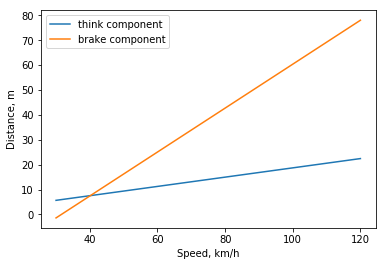

In [11]:
plt.plot(x_think, y_think_prime, label='think component')
plt.plot(x_brake, y_brake_prime, label='brake component')
plt.xlabel('Speed, km/h')
plt.ylabel('Distance, m')
plt.legend()
plt.show()

Calculating distance to stop

In [12]:
x = 110
brake_comp = (brake_line.coef_)*(x) + (brake_line.intercept_)
think_comp = (think_line.coef_)*(x) + (think_line.intercept_)
sum_sq = (brake_comp*brake_comp) + (think_comp*think_comp)

In [13]:
distance_to_stop = math.sqrt(sum_sq)
distance_to_stop

72.22129901258879